In [1]:
#Python Data Analysis imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#To grab stock data
from pandas_datareader import DataReader
from datetime import datetime

In [2]:
#We're going to analyse stock info for Inosys, IBM, Oracle, and Accenture
tech_list = ['INFY']

In [3]:
#Setting the end date to today and start date to one year back
end = datetime.now()
start = datetime(end.year-1,end.month,end.day) 

In [4]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [5]:
INFY.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-05-19,18.450001,18.180000,18.190001,18.440001,4322700.0,18.090746
2021-05-20,18.690001,18.430000,18.440001,18.650000,7019600.0,18.296768
2021-05-21,18.830000,18.700001,18.799999,18.719999,6448300.0,18.365442
2021-05-24,18.709999,18.610001,18.650000,18.670000,3840400.0,18.316389
2021-05-25,18.940001,18.709999,18.850000,18.730000,7172000.0,18.375254


In [6]:
INFY.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,22.674331,22.291850,22.483346,22.487402,8.295022e+06,22.398977
std,1.715490,1.688709,1.705108,1.703694,4.555207e+06,1.740888
min,18.450001,18.180000,18.190001,18.440001,2.151400e+06,18.090746
25%,21.435000,21.047501,21.342500,21.205000,4.913000e+06,21.075486
50%,22.950001,22.545000,22.760000,22.765000,6.967250e+06,22.681425
75%,23.830000,23.530001,23.680000,23.680000,1.002890e+07,23.558512
max,26.389999,25.580000,26.150000,26.200001,2.903560e+07,26.200001


In [7]:
INFY.info()#ensuring no null values in table

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2021-05-19 to 2022-05-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       254 non-null    float64
 1   Low        254 non-null    float64
 2   Open       254 non-null    float64
 3   Close      254 non-null    float64
 4   Volume     254 non-null    float64
 5   Adj Close  254 non-null    float64
dtypes: float64(6)
memory usage: 13.9 KB


<AxesSubplot:xlabel='Date'>

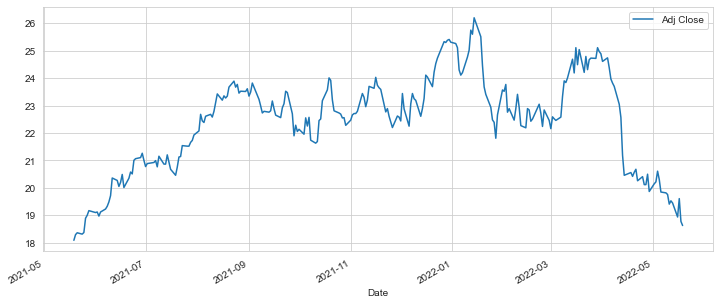

In [8]:
INFY['Adj Close'].plot(legend=True,figsize=(12,5))

<AxesSubplot:xlabel='Date'>

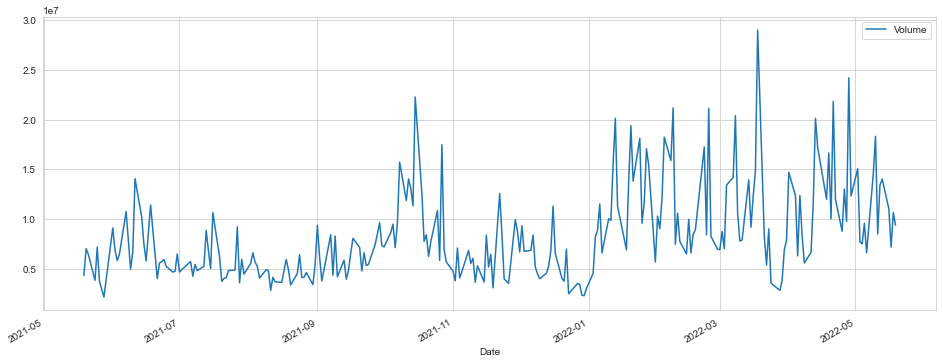

In [9]:
#Plotting the total volume being traded over time
INFY['Volume'].plot(legend=True,figsize=(16,6))

In [10]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    INFY[column_name] = INFY['Adj Close'].rolling(window=ma,center=False).mean()

In [11]:
INFY.tail()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2022-05-13,19.510000,19.190001,19.299999,19.450001,14033200.0,19.450001,19.911,20.1310,22.4230
2022-05-16,19.180000,18.900000,19.129999,18.940001,11057600.0,18.940001,19.790,20.0500,22.3526
2022-05-17,19.620001,19.400000,19.420000,19.610001,7184600.0,19.610001,19.729,20.0095,22.2932
2022-05-18,19.389999,18.760000,19.320000,18.780001,10672000.0,18.780001,19.546,19.9200,22.2022
2022-05-19,18.830000,18.219999,18.360001,18.629999,9392800.0,18.629999,19.378,19.8175,22.0968


<AxesSubplot:xlabel='Date'>

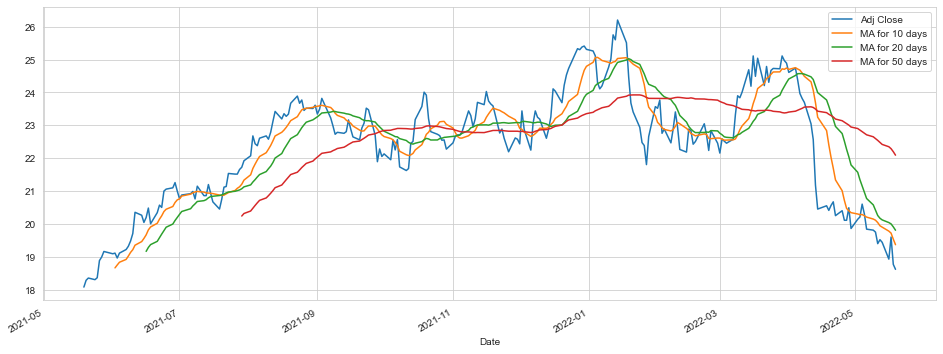

In [12]:
INFY[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(16,6))

In [13]:
INFY['Daily Return'] = INFY['Adj Close'].pct_change()

In [14]:
INFY['Daily Return'].tail()

Date
2022-05-13   -0.004096
2022-05-16   -0.026221
2022-05-17    0.035375
2022-05-18   -0.042325
2022-05-19   -0.007987
Name: Daily Return, dtype: float64

<AxesSubplot:xlabel='Date'>

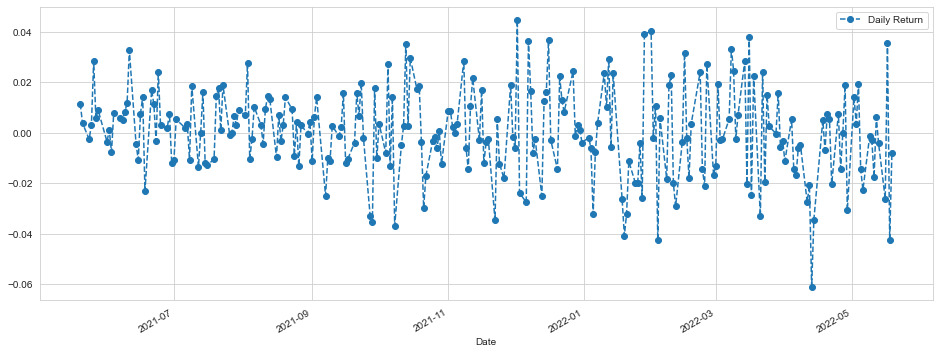

In [15]:
INFY['Daily Return'].plot(figsize=(16,6),legend=True,linestyle='--',marker='o')

<AxesSubplot:xlabel='Daily Return', ylabel='Count'>

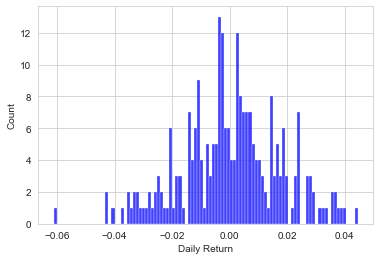

In [16]:
sns.histplot(x=INFY['Daily Return'].dropna(),bins=100,color='blue')

In [19]:
#Reading just the 'Adj Close' column this time
adj_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [20]:
adj_df.tail()

Symbols,INFY
Date,
2022-05-13,19.450001
2022-05-16,18.940001
2022-05-17,19.610001
2022-05-18,18.780001
2022-05-19,18.629999


In [21]:
returns_df = adj_df.pct_change()

In [22]:
returns_df.tail()

Symbols,INFY
Date,
2022-05-13,-0.004096
2022-05-16,-0.026221
2022-05-17,0.035375
2022-05-18,-0.042325
2022-05-19,-0.007987


In [25]:
risk = returns_df.dropna()

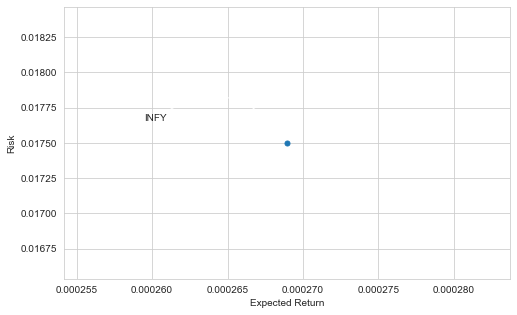

In [28]:
plt.figure(figsize=(8,5))

plt.scatter(risk.mean(),risk.std(),s=25)

plt.xlabel('Expected Return')
plt.ylabel('Risk')


#For adding annotatios in the scatterplot
for label,x,y in zip(risk.columns,risk.mean(),risk.std()):
    plt.annotate(
    label,
    xy=(x,y),xytext=(-120,20),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle='->',connectionstyle = 'arc3,rad=-0.5'))

<AxesSubplot:xlabel='Daily Return', ylabel='Count'>

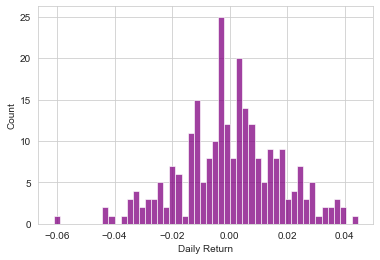

In [35]:
sns.histplot(x=INFY['Daily Return'].dropna(),bins=50,color='purple')

In [33]:
risk.head()

Symbols,INFY
Date,
2021-05-20,0.011388
2021-05-21,0.003753
2021-05-24,-0.002671
2021-05-25,0.003214
2021-05-26,0.028297


In [34]:
risk['INFY'].quantile(0.05)

-0.030195636673152323